In [1]:
# TODO:
'''
1.) Consistent figure sizes and colors
2.) Order notebook to answer questions
3.) Fill in any questions that don't have charts (yet)
4.) Answer questions 7-10
'''

"\n1.) Consistent figure sizes and colors\n2.) Order notebook to answer questions\n3.) Fill in any questions that don't have charts (yet)\n4.) Answer questions 7-10\n"

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")
sns.set_context(context=None, font_scale=1, rc=None)
plt.rcParams['figure.figsize'] = (12, 12)


In [2]:
# Leftover data wrangling
kickstarter = pd.read_csv('kickstarter.csv', index_col = 0)
kickstarter.drop_duplicates(inplace=True)
#kickstarter['launched_at'] = pd.to_datetime((kickstarter['launched_at']))
#kickstarter['deadline'] = pd.to_datetime((kickstarter['deadline']))

In [3]:
# Q1. How many Kickstarter projects are there? What percentage of them were successful?
original_success = kickstarter.groupby(by='state')['goal'].count()
new_state_success = kickstarter.groupby(by='binary_state')['goal'].count()

original_success_labels = original_success.index.values.tolist()
original_success_sizes = original_success.values.tolist()

new_state_labels = new_state_success.index.values.tolist()
new_state_sizes = new_state_success.values.tolist()


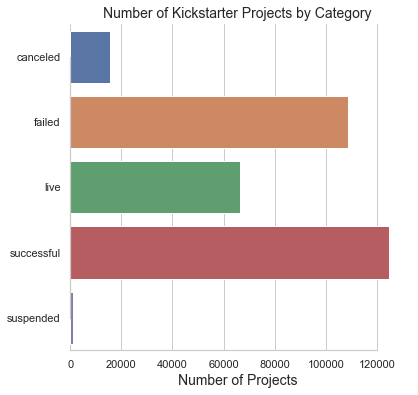

In [4]:
f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=original_success_sizes, y=original_success_labels)
sns.despine(trim=True)
ax.set_title("Number of Kickstarter Projects by Category", fontsize=14)
ax.set_xlabel("Number of Projects", fontsize=14)
plt.show()

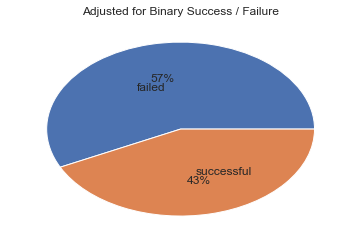

In [5]:
# Do a pie chart instead.
# Show changes to "New state"

new_state_labels = new_state_success.index.values.tolist()
new_state_sizes = new_state_success.values.tolist()

plt.pie(new_state_sizes, labels=new_state_labels, autopct='%.0f%%', labeldistance=.5, textprops={'fontsize': 'large'})
plt.title("Adjusted for Binary Success / Failure", fontsize='large')
plt.show()

In [6]:
# Breaking down success by category slug
success_by_category_name = pd.pivot_table(kickstarter, index='category_slug', columns='binary_state', values='goal', aggfunc='count', fill_value = 0)
print(success_by_category_name)

binary_state   failed  successful
category_slug                    
art             14555       11644
comics           3659        7163
crafts           4477        2469
dance             899        2435
design          11033       11187
fashion         13793        6934
film & video    22790       21825
food            12701        6091
games           18081       15359
journalism       3871        1130
music           20937       20091
photography      4237        3580
publishing      23649       12961
technology      24082        7275
theater          2319        5239


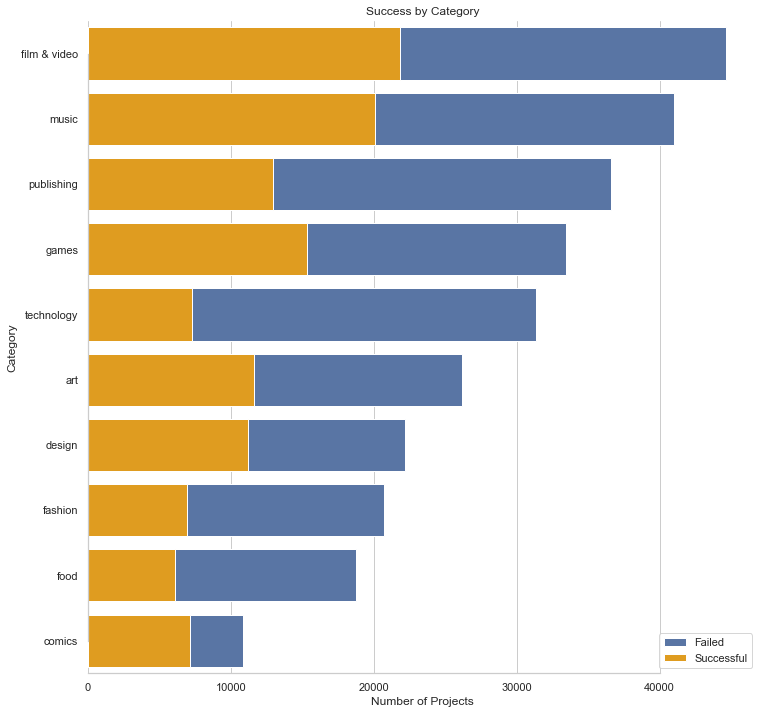

In [7]:
# Breaking down success by category
success_by_category_name = pd.pivot_table(kickstarter, index='category_slug', columns='binary_state', values='goal', aggfunc='count', fill_value = 0)
success_by_category_name['total'] = success_by_category_name['failed'] + success_by_category_name['successful'] 
success_by_category_name['success_rate'] = success_by_category_name['successful'] / success_by_category_name['total']
top10categories = success_by_category_name.sort_values(by='total', ascending=False).head(10).reset_index()

f, ax = plt.subplots(figsize=(12, 12))

sns.barplot(x="total", y="category_slug", data=top10categories, label="Failed", color="b")
sns.barplot(x="successful", y="category_slug", data=top10categories, label="Successful", color='orange')
sns.despine(trim=True)

plt.title("Success by Category")
plt.xlabel("Number of Projects")
plt.ylabel("Category")
plt.legend()
plt.show()


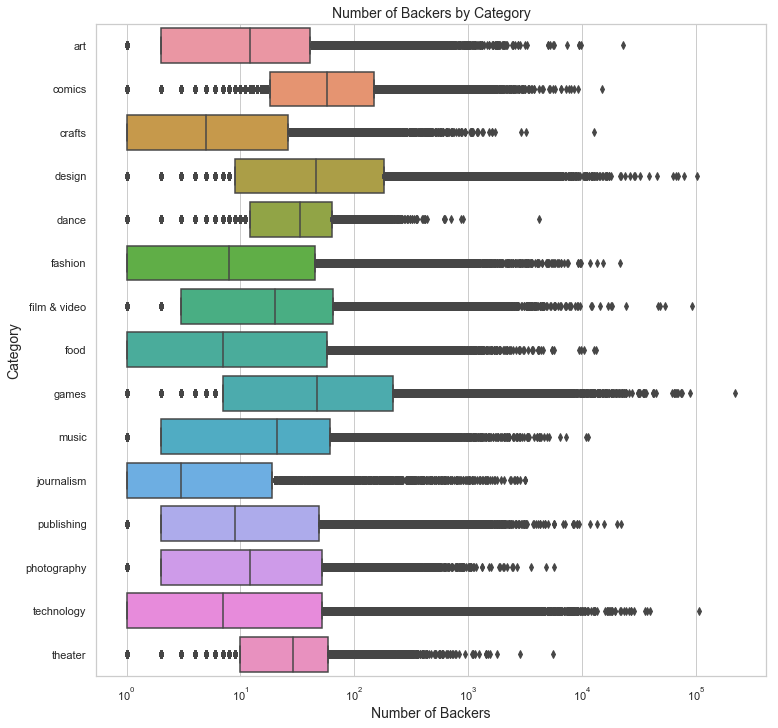

In [8]:
f, ax = plt.subplots(figsize=(12, 12))
sns.boxplot(x='backers_count', y='category_slug', data=kickstarter, whis=[25, 75])
ax.set_xscale("log")
ax.set_title("Number of Backers by Category", fontsize=14)
ax.set_xlabel("Number of Backers", fontsize=14)
ax.set_ylabel("Category", fontsize=14)
plt.show()

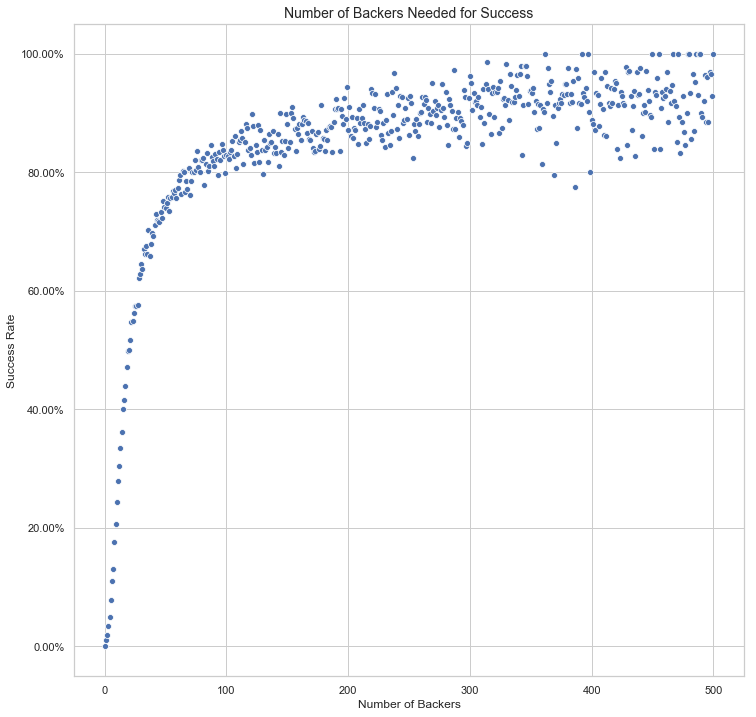

In [9]:
# How many projects have N number of backers? If you have N backers, what is your success rate?
nbackers = kickstarter.groupby(['backers_count', 'binary_state']).count()
nbackers = nbackers['state'].unstack()
nbackers = nbackers.fillna(0)
nbackers['success_rate'] = nbackers['successful'] / (nbackers['failed'] + nbackers['successful'])
plot = nbackers['success_rate'][0:500]
nbackersdf = pd.DataFrame(nbackers[0:501])


# Now make this pretty!
f, ax = plt.subplots(figsize=(12, 12))

sns.scatterplot(data = nbackersdf['success_rate'])
ax.set_xlabel('Number of Backers')
ax.set_ylabel('Success Rate')
ax.set_title('Number of Backers Needed for Success', fontsize=14)

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
plt.show()


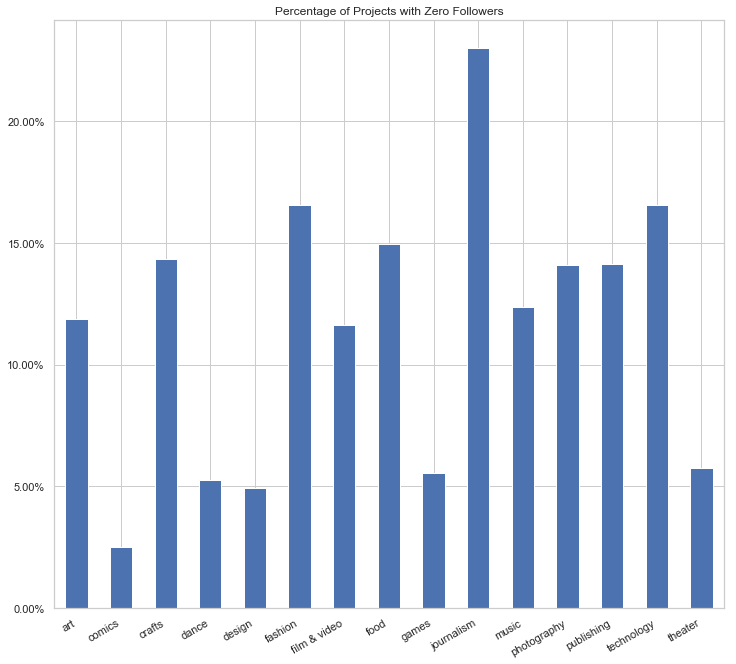

In [10]:
# Zero followers
kickstarter[kickstarter['backers_count'] == 0].groupby('category_slug').count()['id'] 
zero_followers = kickstarter[kickstarter['backers_count'] == 0].groupby('category_slug').count()['id']  / kickstarter['category_slug'].value_counts()
f, ax = plt.subplots(figsize=(12, 12))
zero_followers.plot(kind='bar')
f.autofmt_xdate()
ax.set_title("Percentage of Projects with Zero Followers")
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
plt.show()

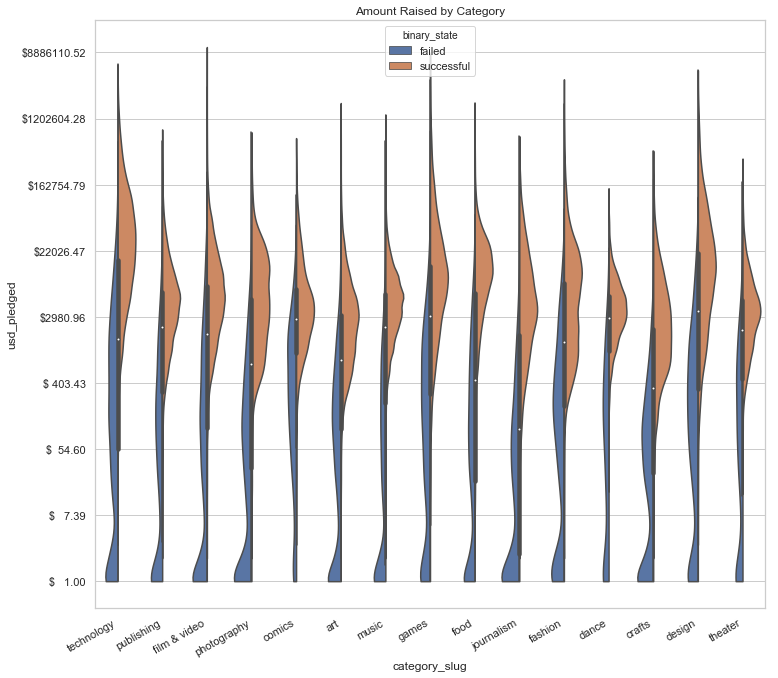

In [42]:
f, ax = plt.subplots(figsize=(12, 12))
# Violin plot with category slug on X-axis, usd_pledged on Y-axis, colored by new state.
g = sns.violinplot(x=kickstarter["category_slug"], 
                    y=np.log1p(kickstarter["usd_pledged"]), 
                    hue=kickstarter["binary_state"], 
                    cut=0, 
                    split=True,
                    aspect=3)
ax.set_xticklabels(ax.get_xticklabels(), rotation=270)
g.set_title("Amount Raised by Category")
vals = ax.get_yticks()
exp_vals = [np.exp(val) for val in vals]
ax.set_yticklabels(['${0:7.2f}'.format(x) for x in exp_vals])
f.autofmt_xdate()
# Change margins of lower end of canvas

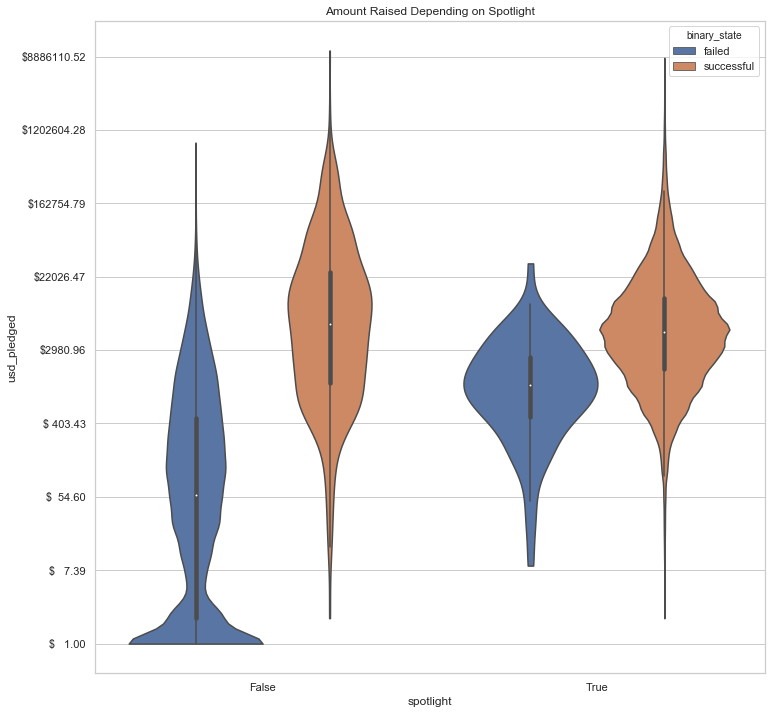

In [66]:
f, ax = plt.subplots(figsize=(12, 12))
# It would be cool IF: One violin plot, one side "failed", other side "successful"
g = sns.violinplot(x=kickstarter["spotlight"], y=np.log1p(kickstarter["usd_pledged"]), hue=kickstarter["binary_state"], cut=0)
vals = ax.get_yticks()
exp_vals = [np.exp(val) for val in vals]
ax.set_yticklabels(['${0:7.2f}'.format(x) for x in exp_vals])
g.set_title("Amount Raised Depending on Spotlight");

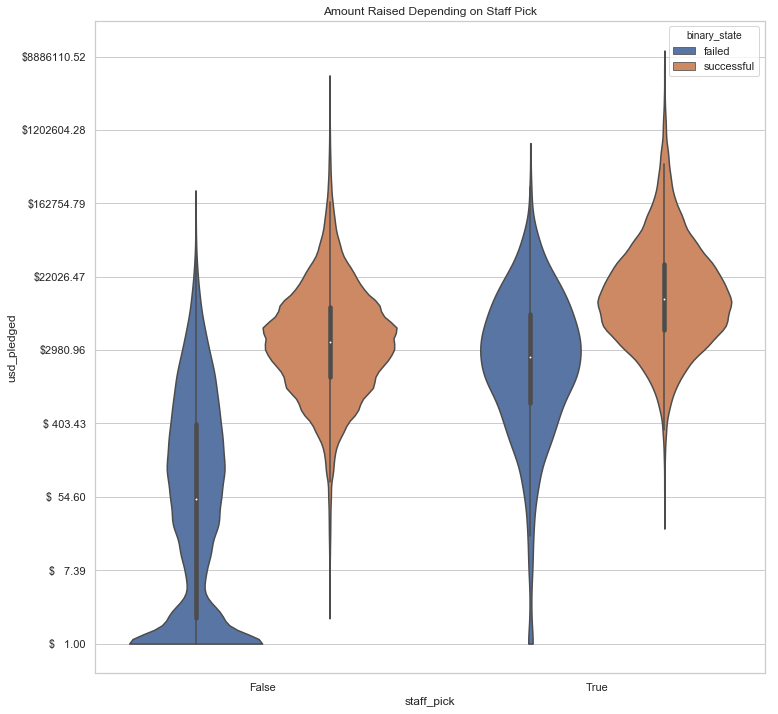

In [67]:
f, ax = plt.subplots(figsize=(12, 12))
g = sns.violinplot(x=kickstarter["staff_pick"], y=np.log1p(kickstarter["usd_pledged"]), hue=kickstarter["binary_state"], cut=0)
vals = ax.get_yticks()
exp_vals = [np.exp(val) for val in vals]
ax.set_yticklabels(['${0:7.2f}'.format(x) for x in exp_vals])
g.set_title("Amount Raised Depending on Staff Pick");

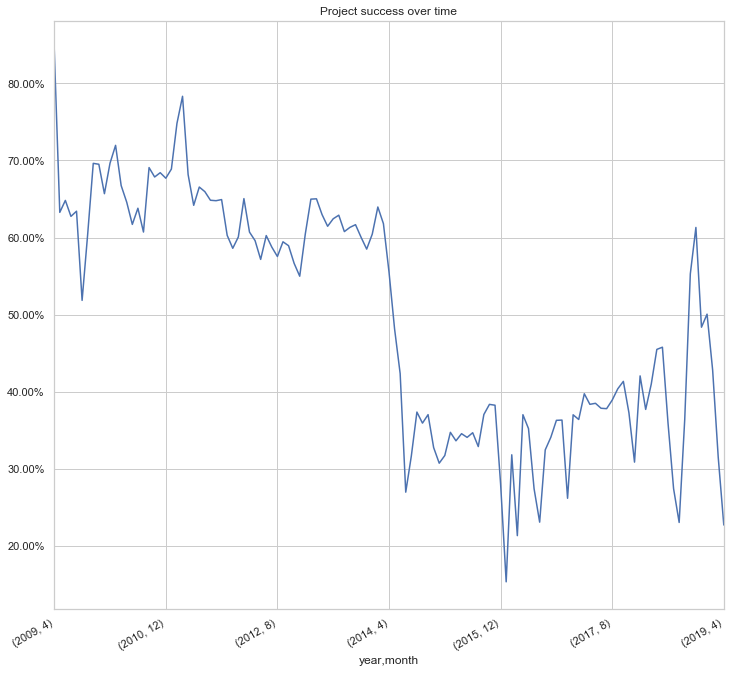

In [54]:
timeseries = kickstarter.groupby(['year', 'month', 'binary_state']).count()
timeseries = timeseries['id'].unstack('binary_state').fillna(0)
timeseries['success_rate'] = timeseries['successful'] / (timeseries['failed'] + timeseries['successful'])

f, ax = plt.subplots(figsize=(12, 12))
timeseries['success_rate'].plot()
ax.set_title('Project success over time')
xvals = ax.get_xticks()
yvals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in yvals])
f.autofmt_xdate()

In [15]:
kickstarter.to_csv(r'C://Users/Tom/Documents/Kickstarter/storytelling_master.csv')